Scraping the Course Browser

In [330]:
!pip install selenium

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.options import Options
import seaborn as sns
import pandas as pd


In [2]:
options = Options()
options.page_load_strategy = 'eager'

In [3]:
DRIVER_PATH = '/Users/abguh/Desktop/wdc/chromedriver'
driver = webdriver.Chrome(executable_path=DRIVER_PATH, options=options)

In [4]:
driver.get('https://courses.wellesley.edu')

In [5]:
sem_box = driver.find_element_by_name("semester") #the semester box
terms_id = [x for x in sem_box.find_elements_by_tag_name("option")] #create a list of all the terms to pick from 
terms = [(x.get_attribute("value"), x.text) for x in terms_id] 
semesters = [x for x in terms if 'Fall' in x[1] or 'Spring' in x[1]]
num_sems = len(semesters)



In [6]:
dropdown = Select(driver.find_element_by_id("department"))
dropdown.select_by_value("CS")
driver.find_elements_by_name("submit")[1].click()


In [7]:
def get_class_names():
    classes = driver.find_elements_by_class_name('coursecode') #list of all classes as web elements
    class_names = []
    for i in range(len(classes)):
        course_info = driver.find_element_by_id('bgrnd_'+str(i)).text
        if 'MAS ' not in course_info:
            class_names.append((course_info[:7].strip(), course_info[course_info.find('X:')+3:course_info.find('X:')+4]))
    return class_names


In [8]:
def get_class_stats(semester):
    dropdown1 = Select(driver.find_element_by_id("semester")) #find the semester button
    dropdown1.select_by_value(semester)      #click on the correct semester
    
    driver.find_elements_by_name("submit")[1].click() #submit to start search
    
    classes = driver.find_elements_by_class_name('coursecode') #list of all classes as web elements
    class_names = []
    num_full = 0
    professors = set([x.text for x in driver.find_elements_by_class_name('professorname') if len(x.text)<40])
    for i in range(len(classes)):
        info = driver.find_element_by_id('bgrnd_'+str(i)).text
        if 'MAS ' not in info:
            class_names.append((info[:7].strip(), info[info.find('X:')+3:info.find('X:')+4]))
            if info[info.find('X:')+3:info.find('X:')+4] == '0': num_full = num_full + 1
        
    return (len(classes), num_full, len(professors))

In [9]:
cs_dict = {}

for semester in semesters: #semester is a tuple of (value, sem name) 
    dropdown = Select(driver.find_element_by_id("department"))
    dropdown.select_by_value("CS")
    driver.find_elements_by_name("submit")[1].click()
    cs_dict[semester[1]] = get_class_stats(semester[0])

In [10]:
cs_dict

{'Spring 2021': (46, 26, 16),
 'Fall 2020': (42, 24, 16),
 'Spring 2020': (46, 18, 16),
 'Fall 2019': (45, 13, 15),
 'Spring 2019': (47, 20, 16),
 'Fall 2018': (54, 14, 18),
 'Spring 2018': (42, 26, 14),
 'Fall 2017': (48, 20, 20),
 'Spring 2017': (41, 15, 16),
 'Fall 2016': (50, 11, 19),
 'Spring 2016': (38, 18, 18),
 'Fall 2015': (38, 16, 14),
 'Spring 2015': (36, 12, 14),
 'Fall 2014': (40, 15, 14),
 'Spring 2014': (30, 14, 11),
 'Fall 2013': (30, 8, 11),
 'Spring 2013': (27, 8, 10),
 'Fall 2012': (31, 11, 10),
 'Spring 2012': (26, 6, 11),
 'Fall 2011': (28, 6, 11),
 'Spring 2011': (27, 2, 11),
 'Fall 2010': (27, 4, 12),
 'Spring 2010': (26, 2, 13),
 'Fall 2009': (26, 3, 12),
 'Spring 2009': (25, 1, 10),
 'Fall 2008': (24, 4, 10),
 'Spring 2008': (29, 1, 13),
 'Fall 2007': (25, 3, 11),
 'Spring 2007': (27, 0, 11)}

In [12]:
years = []
seasons = []
num_classes = []
num_spots = []
profs = []
y = [x for x in range(len(num_classes)+5)]
for key in cs_dict:
    years.append(key[-4:])
    seasons.append(key[:-5])
    num_classes.append(cs_dict[key][0])
    num_spots.append(cs_dict[key][1])
    profs.append(cs_dict[key][2])

years = [x for x in reversed(years)]
seasons = [x for x in reversed(seasons)]
num_classes = [x for x in reversed(num_classes)]
num_spots = [x for x in reversed(num_spots)]
profs = [x for x in reversed(profs)]


In [13]:
df = pd.DataFrame(list(zip(years, seasons, num_classes, num_spots, profs)), columns = ['Year', 'Semester', 'Num Classes', 'Num Classes Full', 'Num Professors'])
df

,Year,Semester,Num Classes,Num Classes Full,Num Professors
0,2007,Spring,27,0,11
1,2007,Fall,25,3,11
2,2008,Spring,29,1,13
3,2008,Fall,24,4,10
4,2009,Spring,25,1,10
5,2009,Fall,26,3,12
6,2010,Spring,26,2,13
7,2010,Fall,27,4,12
8,2011,Spring,27,2,11
9,2011,Fall,28,6,11


In [14]:
df.columns
df = pd.melt(df, id_vars = ['Year', 'Semester'], value_vars = ['Num Classes', 'Num Classes Full', 'Num Professors'])
df

,Year,Semester,variable,value
0,2007,Spring,Num Classes,27
1,2007,Fall,Num Classes,25
2,2008,Spring,Num Classes,29
3,2008,Fall,Num Classes,24
4,2009,Spring,Num Classes,25
...,...,...,...,...
82,2019,Spring,Num Professors,16
83,2019,Fall,Num Professors,15
84,2020,Spring,Num Professors,16
85,2020,Fall,Num Professors,16


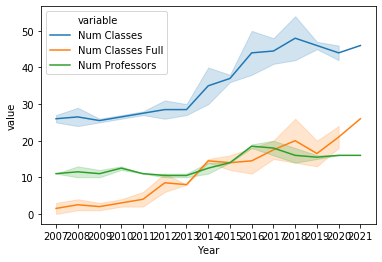

In [15]:
sns.lineplot(x="Year", y="value", hue="variable", data=df)